In [1]:
import os
import pandas as pd

from D_oblique_decision_trees.evaluation.benchmark_runner import DepthSweepRunner
from D_oblique_decision_trees.visualization import (
    plot_tradeoff_for_oblique_tree,
    plot_separate_metric_against_depth,
    plot_aggregated_metric_against_depth,
    plot_metric_by_depth_per_shape
)
from src.load_shapes import load_all_shape_datasets
from src.config.paths import DEPTH_SWEEP_BATCH_RESULTS_OUTPUTS_DIR

In [2]:
all_data = load_all_shape_datasets()

Starting CSV file loading process from C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\shapes

Paired dataset 'barbell_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'barbell_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'radial_segment_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'radial_segment_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'rectangle_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'saddle_3d': X shape (10000, 3), y shape (10000,)
Paired dataset 'sine_wave_2d': X shape (5000, 2), y shape (5000,)
Paired dataset 'star_2d': X shape (5000, 2), y shape (5000,)

Datasets available: ['barbell_2d', 'barbell_3d', 'radial_segment_2d', 'radial_segment_3d', 'rectangle_2d', 'saddle_3d', 'sine_wave_2d', 'star_2d']


In [3]:
all_datasets_dict = {
    "barbell_2d": all_data["barbell_2d"],
    "sine_wave_2d": all_data["sine_wave_2d"],
    "star_2d": all_data["star_2d"],
    "radial_segment_2d": all_data["radial_segment_2d"],
    "rectangle_2d": all_data["rectangle_2d"],
    "barbell_3d": all_data["barbell_3d"],
    "radial_segment_3d": all_data["radial_segment_3d"],
    "saddle_3d": all_data["saddle_3d"]
}

In [ ]:
runner = DepthSweepRunner(all_datasets_dict, max_depth=15)
depth_sweep_df = runner.run(filename="depth_sweep_all.csv", n_seeds=5)

Depth Sweeping:   2%|▏         | 54/2400 [02:34<9:53:35, 15.18s/it]

In [4]:
# Load CSV
results_file = os.path.join(DEPTH_SWEEP_BATCH_RESULTS_OUTPUTS_DIR, "depth_sweep.csv")
df = pd.read_csv(results_file)

In [5]:
# Prepare folders for different plot types
plot_root_dir = os.path.join(DEPTH_SWEEP_BATCH_RESULTS_OUTPUTS_DIR, "plots")
per_algorithm_dataset_dir = os.path.join(plot_root_dir, "grouped_by_algorithm_and_dataset")
per_algorithm_dir = os.path.join(plot_root_dir, "grouped_by_algorithm")
per_shape_dir = os.path.join(plot_root_dir, "grouped_by_shape")

for path in [per_algorithm_dataset_dir, per_algorithm_dir, per_shape_dir]:
    os.makedirs(path, exist_ok=True)

In [6]:
# Plot settings
metrics = ["accuracy", "coverage", "density"]
x_lim = (0, df["depth"].max())
y_lim = (0.0, 1.0)

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm_and_dataset\accuracy_vs_depth__grouped_by_algorithm_and_dataset.pdf


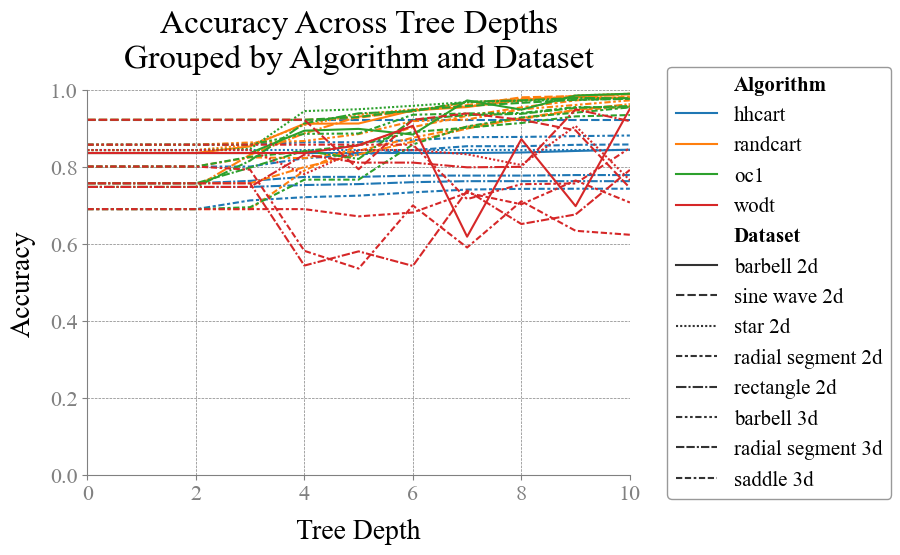

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm_and_dataset\coverage_vs_depth__grouped_by_algorithm_and_dataset.pdf


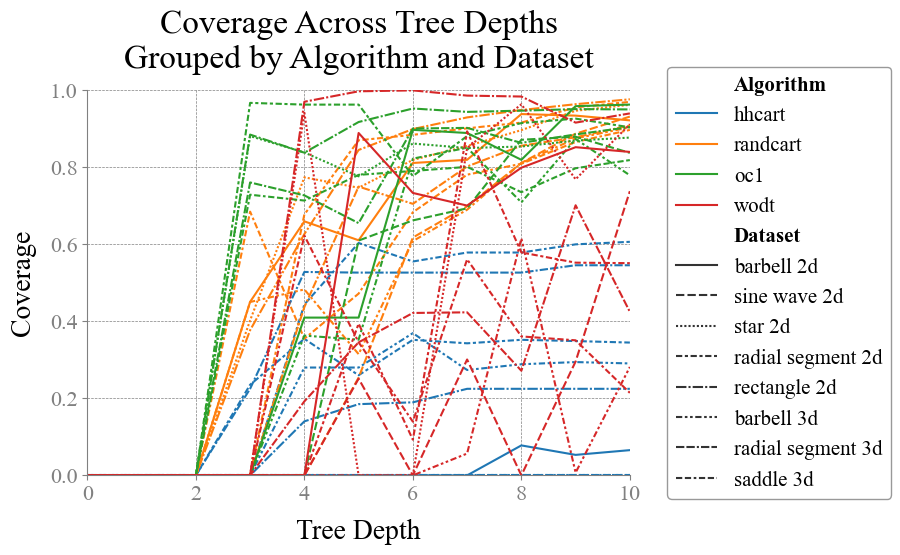

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm_and_dataset\density_vs_depth__grouped_by_algorithm_and_dataset.pdf


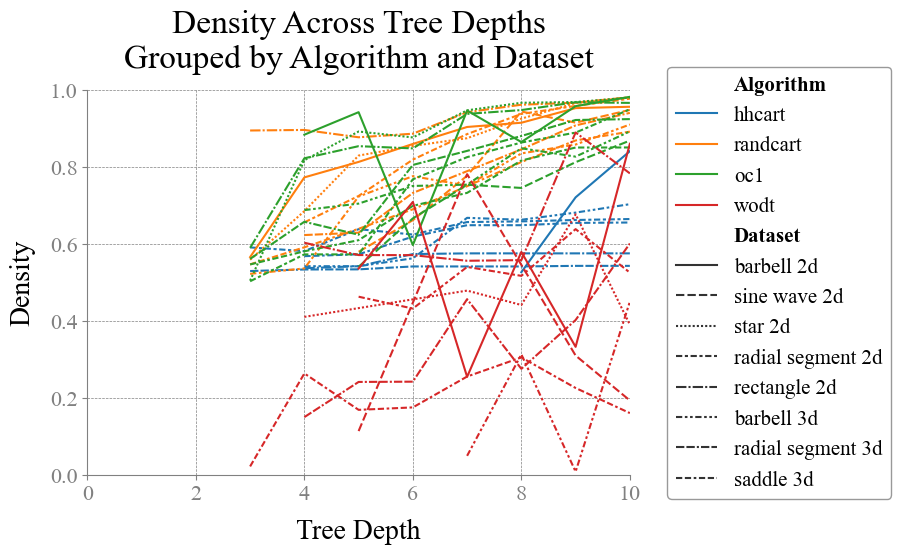

In [7]:
# === 1. One line per algorithm-dataset combo === #
for metric in metrics:
    save_path = os.path.join(per_algorithm_dataset_dir, f"{metric}_vs_depth__grouped_by_algorithm_and_dataset.pdf")
    title = f"{metric.capitalize()} Across Tree Depths\nGrouped by Algorithm and Dataset"
    
    plot_separate_metric_against_depth(
        df=df,
        metric=metric,
        title=title,
        x_lim=x_lim,
        y_lim=y_lim,
        xlabel="Tree Depth",
        ylabel=metric.capitalize(),
        save_name=save_path
    )

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm\accuracy_vs_depth__grouped_by_algorithm_std.pdf


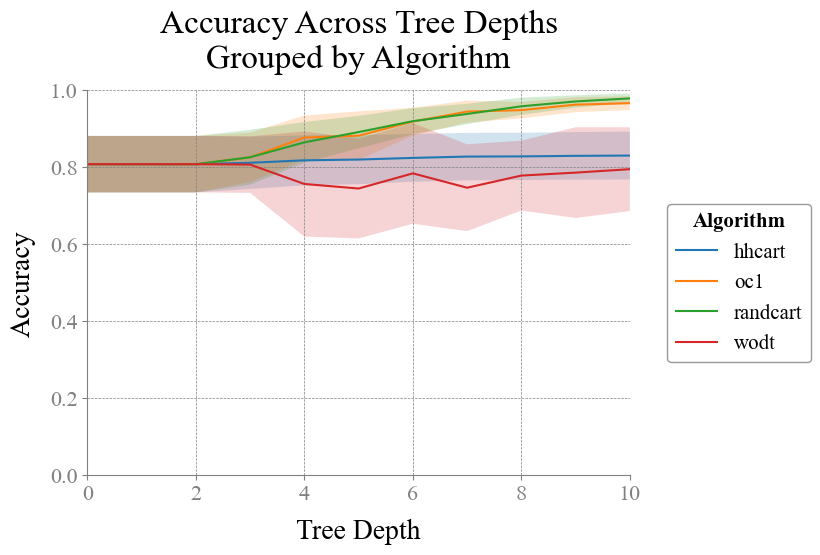

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm\coverage_vs_depth__grouped_by_algorithm_std.pdf


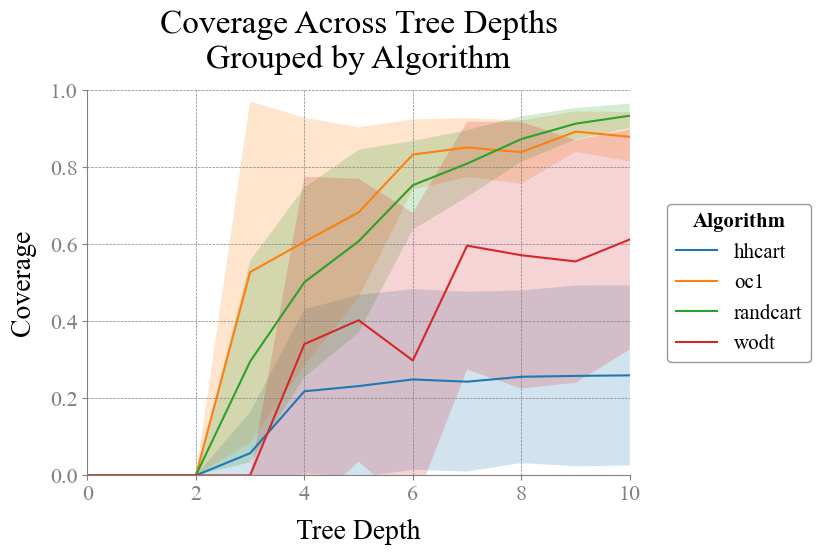

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_algorithm\density_vs_depth__grouped_by_algorithm_std.pdf


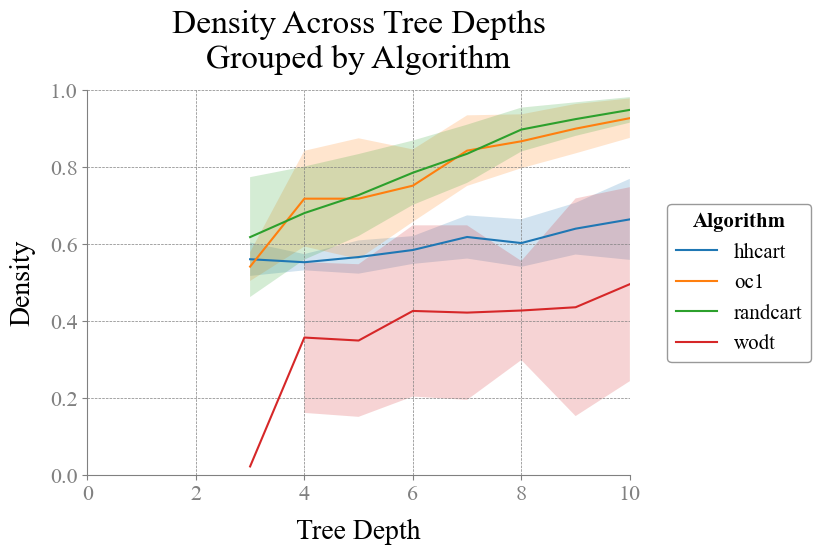

In [9]:
# === 2. Aggregated by algorithm (mean over datasets) === #
for metric in metrics:
    save_path = os.path.join(per_algorithm_dir, f"{metric}_vs_depth__grouped_by_algorithm.pdf")
    title = f"{metric.capitalize()} Across Tree Depths\nGrouped by Algorithm"

    plot_aggregated_metric_against_depth(
        df=df,
        metric=metric,
        title=title,
        x_lim=x_lim,
        y_lim=y_lim,
        xlabel="Tree Depth",
        ylabel=metric.capitalize(),
        save_name=save_path,
        show_bands=False
    )

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_shape\accuracy_vs_depth__grouped_by_shape.pdf


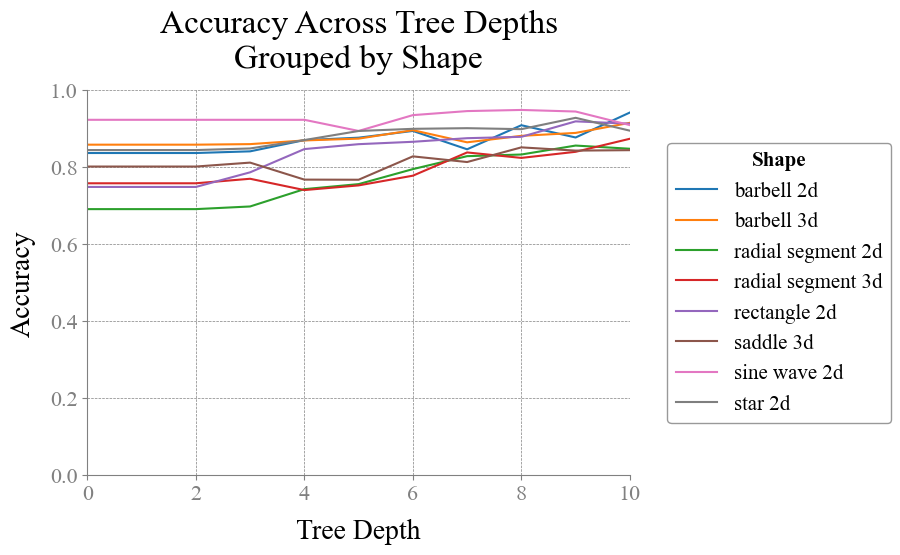

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_shape\coverage_vs_depth__grouped_by_shape.pdf


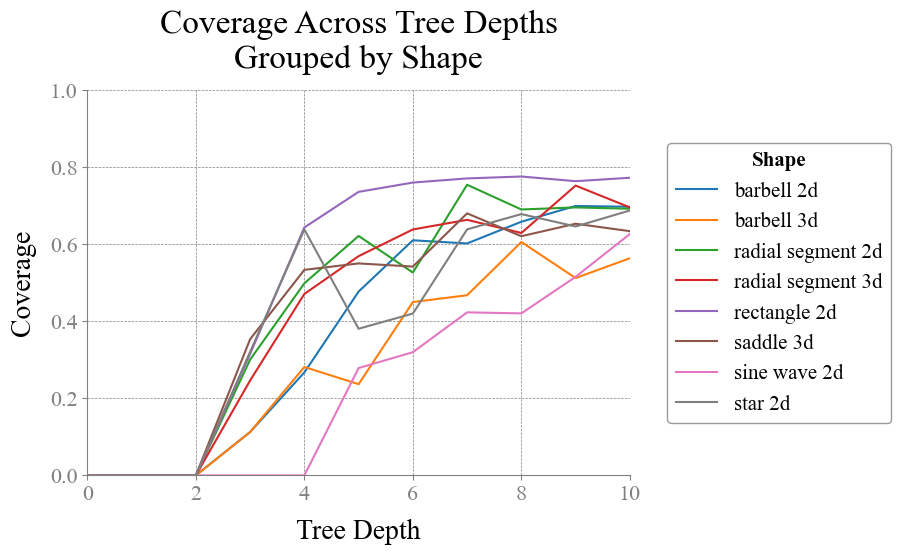

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_batch_results\plots\grouped_by_shape\density_vs_depth__grouped_by_shape.pdf


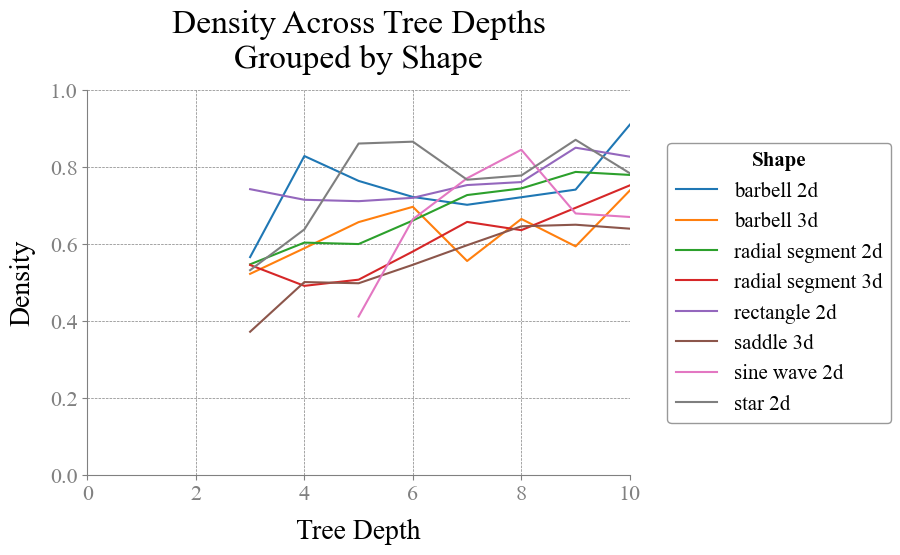

In [11]:
# === 3. Aggregated by shape (mean over algorithms) === #
for metric in metrics:
    save_path = os.path.join(per_shape_dir, f"{metric}_vs_depth__grouped_by_shape.pdf")
    title = f"{metric.capitalize()} Across Tree Depths\nGrouped by Shape"

    plot_metric_by_depth_per_shape(
        df=df,
        metric=metric,
        title=title,
        x_lim=x_lim,
        y_lim=y_lim,
        xlabel="Tree Depth",
        ylabel=metric.capitalize(),
        save_name=save_path,
        show_bands=False
    )

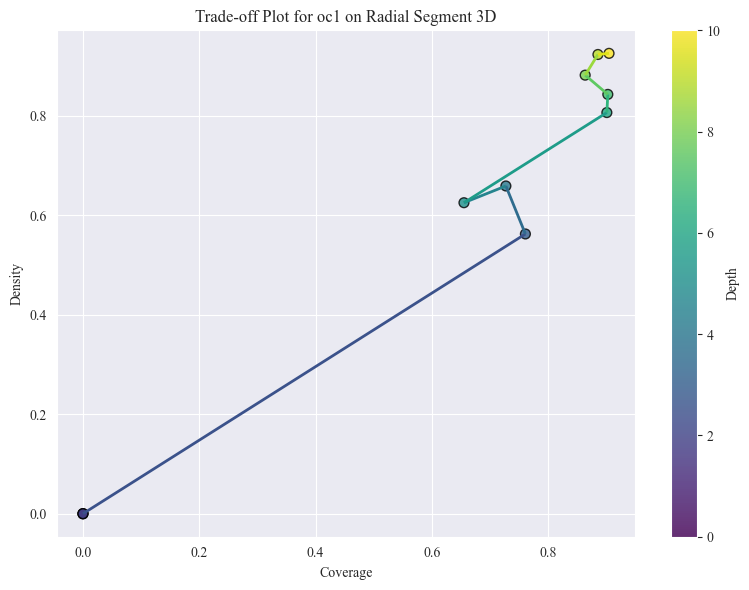

In [7]:
# Choose a dataset and model for example trade-off exploration
example_dataset = "radial_segment_3d"
example_model = "oc1"

plot_tradeoff_for_oblique_tree(
    df,
    example_model,
    example_dataset,
    color_metric="depth",
    cmap="viridis"
)